In [12]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
%matplotlib inline

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [13]:
df = pd.read_excel(r'D:\paper\safety\data\max_accident_data\accident_type.xlsx')
data = df.copy().drop('Unnamed: 6',axis =1)
data.columns = ['time','province','city','accident','death','injury']
data.head()

,time,province,city,accident,death,injury
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN


In [14]:
def get_year_month_day(df,time_col):
    
    '''Extract the year, month, and day of the time field data'''
    
    df['year'] = df[time_col].dt.year
    df['month'] = df[time_col].dt.month
    df['day'] = df[time_col].dt.day
    return df

In [15]:
get_year_month_day(data,'time').tail()

,time,province,city,accident,death,injury,year,month,day
848,2019-11-18,山西,晋中市平遥县,峰岩集团二亩沟矿瓦斯爆炸,15.0,NaN,2019,11,18
849,2019-11-26,云南,临沧市凤庆县,安石隧道掌子面突泥涌水,12.0,NaN,2019,11,26
850,2019-12-03,浙江,海宁市许村镇工业园,龙洲印染有限责任公司污水厌氧罐倒塌,10.0,NaN,2019,12,3
851,2019-12-04,湖南,浏阳市,澄潭江镇碧溪烟花制造有限公司违法生产致爆炸,13.0,NaN,2019,12,4
852,2019-12-17,贵州,安龙县,广隆煤矿煤与瓦斯突出,14.0,NaN,2019,12,17


### 加载中国2005-2019年节假日和加班的情况
* ① 加载节假日的数据
* ② 加载加班的数据

In [16]:
#① 加载节假日的数据
holidays = pd.read_excel(r'D:\paper\safety\data\holidays.xlsx',usecols=['日期','节假日'])
holidays.tail()

,日期,节假日
410,2019-10-03,国庆节
411,2019-10-04,国庆节
412,2019-10-05,国庆节
413,2019-10-06,国庆节
414,2019-10-07,国庆节


In [17]:
#将时间数据转化为可用的数据格式
holidays_date = [holidays.loc[i,'日期'].date() for i in range(len(holidays))]
holidays_date[-5:]

[datetime.date(2019, 10, 3),
 datetime.date(2019, 10, 4),
 datetime.date(2019, 10, 5),
 datetime.date(2019, 10, 6),
 datetime.date(2019, 10, 7)]

In [18]:
#② 加载加班的数据
add_work = pd.read_excel(r'D:\paper\safety\data\add_work.xlsx',usecols=['日期','节假日'])
add_work.tail()

,日期,节假日
90,2019-02-03,春节
91,2019-04-28,劳动节
92,2019-05-05,劳动节
93,2019-09-29,国庆节
94,2019-10-12,国庆节


In [19]:
#将时间数据转化为可用的数据格式
add_work_date = [add_work.loc[i,'日期'].date() for i in range(len(add_work))]
add_work_date[-5:]

[datetime.date(2019, 2, 3),
 datetime.date(2019, 4, 28),
 datetime.date(2019, 5, 5),
 datetime.date(2019, 9, 29),
 datetime.date(2019, 10, 12)]

### 判断事故发生的时间是否为休息日

In [20]:
def restday(year,month,day,holidays_date,add_work_date):
    is_holiday    = [None]*len(year)
    is_weekend = [None]*len(year)
    i=0
    for yy,mm,dd in zip(year,month,day):        
        is_weekend[i] = (date(yy,mm,dd) not in add_work_date) and (date(yy,mm,dd).isoweekday() in (6,7)) and (date(yy,mm,dd) not in holidays_date)
        is_holiday[i] = date(yy,mm,dd) in holidays_date 
        i+=1
    return is_holiday,is_weekend

In [21]:
year,month,day = data.time.dt.year, data.time.dt.month, data.time.dt.day
holiday,weekend = restday(year,month,day,holidays_date,add_work_date)
data['holiday'] = holiday
data['weekend'] = weekend

In [22]:
data.head()
#证明是有在节假日和周末发生的事故

,time,province,city,accident,death,injury,year,month,day,holiday,weekend
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,2005,1,5,False,False
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,2005,1,6,False,False
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,2005,1,11,False,False
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,2005,1,12,False,False
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,2005,1,16,False,True


## 添加节假日数据

In [23]:
data = pd.merge(data,holidays,left_on = 'time', right_on = '日期', how = 'left')
data.head()

,time,province,city,accident,death,injury,year,month,day,holiday,weekend,日期,节假日
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,2005,1,5,False,False,NaT,NaN
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,2005,1,6,False,False,NaT,NaN
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,2005,1,11,False,False,NaT,NaN
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,2005,1,12,False,False,NaT,NaN
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,2005,1,16,False,True,NaT,NaN


In [24]:
#这时候就可以删除日期字段了(它的作用就是用来作为合并数据的依据)，
#有两个节假日信息，第一个英文的是是否为节假日，第二个是具体的节假日名称（这也是为什么这一列单独使用汉字的原因）
data.drop('日期',axis=1,inplace = True)

In [25]:
data

,time,province,city,accident,death,injury,year,month,day,holiday,weekend,节假日
0,2005-01-05,山西,运城市平陆县境内平风线,翻车,12.0,12.0,2005,1,5,False,False,NaN
1,2005-01-06,福建,莆田市同三线高速公路莆田灵川路段,车辆失控,28.0,19.0,2005,1,6,False,False,NaN
2,2005-01-11,山西,临汾市襄汾县京安村襄浏花炮厂装配车间,爆炸,25.0,10.0,2005,1,11,False,False,NaN
3,2005-01-12,河南,洛阳市宜阳县城关乡乔岩直井煤矿,瓦斯燃烧,10.0,17.0,2005,1,12,False,False,NaN
4,2005-01-16,重庆,南川区南城街道办事处云华煤业有限公司,煤与瓦斯突出,12.0,NaN,2005,1,16,False,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
848,2019-11-18,山西,晋中市平遥县,峰岩集团二亩沟矿瓦斯爆炸,15.0,NaN,2019,11,18,False,False,NaN
849,2019-11-26,云南,临沧市凤庆县,安石隧道掌子面突泥涌水,12.0,NaN,2019,11,26,False,False,NaN
850,2019-12-03,浙江,海宁市许村镇工业园,龙洲印染有限责任公司污水厌氧罐倒塌,10.0,NaN,2019,12,3,False,False,NaN
851,2019-12-04,湖南,浏阳市,澄潭江镇碧溪烟花制造有限公司违法生产致爆炸,13.0,NaN,2019,12,4,False,False,NaN


### 因调休周末上班发生的事故

In [27]:
data['weekend_work'] = data.apply(lambda x: date(x.year,x.month,x.day) in add_work_date, axis = 1)
print(len(data[data['weekend_work']== True]))
data[data['weekend_work']== True]

15


,time,province,city,accident,death,injury,year,month,day,holiday,weekend,节假日,weekend_work
38,2005-04-30,贵州,纳雍县鬃岭镇乡镇煤矿嫩草冲煤矿,瓦斯爆炸,12.0,NaN,2005,4,30,False,False,NaN,True
90,2005-10-08,浙江,湖州市开发区九九桥,坠河,22.0,NaN,2005,10,8,False,False,NaN,True
164,2006-04-29,陕西,延安市子长县瓦窑堡煤矿,瓦斯爆炸,27.0,5.0,2006,4,29,False,False,NaN,True
165,2006-04-30,陕西,镇安县米粮镇光明村山沟镇安黄金尾矿,溃坝,NaN,22.0,2006,4,30,False,False,NaN,True
199,2006-09-30,黑龙江,鸡西市鸡东县哈达天龙煤矿,瓦斯爆炸,13.0,NaN,2006,9,30,False,False,NaN,True
306,2007-12-29,黑龙江,牡丹江市穆棱市顺发煤矿,瓦斯,1.0,20.0,2007,12,29,False,False,NaN,True
317,2008-02-03,福建,宁德市远洋渔业集团公司,沉船,NaN,12.0,2008,2,3,False,False,NaN,True
405,2009-02-01,内蒙古,赤峰市喀喇沁旗王爷府镇团结地村路段一交乂道口,相撞,10.0,9.0,2009,2,1,False,False,NaN,True
538,2010-10-09,江苏,南京市浦口区宁合高速公路454km+100m处,槽罐大客相撞,17.0,6.0,2010,10,9,False,False,NaN,True
570,2011-04-02,新疆,乌鲁木齐市焦煤集团主焦煤分公司艾维尔沟煤矿,发生冒顶,10.0,NaN,2011,4,2,False,False,NaN,True


### 周末和及假日的重大事故情况

In [28]:
#周末的事故情况（正常的假期间）
data.weekend.value_counts()

False    629
True     224
Name: weekend, dtype: int64

In [29]:
#节假日的事故情况
data.holiday.value_counts()

#至此就可以发现工作日与非工作日之间的事故比例

False    789
True      64
Name: holiday, dtype: int64

### 正常工作日事故次数
* 正常工作日事故次数为：总事故数 - 节假日事故数 - 周末休息日事故数 - 调休周末上班日事故数

In [30]:
853 - 64 - 224 - 15

550

In [31]:
15/ 853 * 100

1.7584994138335288

## 结果

#### ①各时段的事故数量及占比
* 节假日发生事故起数： 64  事故占比为： 7.50%
* 正常周末休息发生的事故起数为： 224     事故占比为： 26.26%
* 因节假日调休周末上班发生的事故起数为： 15   事故占比为： 1.76%
* 正常上班发生的事故起数为： 853 - 64 - 224 - 15 = 550  事故占比为： 64.48%

#### ② 工作日与非工作日事故占比
* 工作日特大事故占比： (550 + 15) / 853 = 66.24%
* 非工作日特大事故占比： (224 + 64) / 853 = 33.76%

#### ③ 事故率计算
按照一年是365天，我国实际节假日是虽然从05年到18年有所变动（实际的有效假日变化不大），有效工作提250天，剩下的就是休息日115天
2007年往后将五一长假缩短，添加了端午和中秋（实际有效假日几乎没有发生变化），然后15年增加一个胜利日（这一年是增加一天假）

* 平均事故率： 853 / (365*15) = 15.56%
* 工作日平均事故率    (550 + 15) / (250*15) = 15.07%
* 非工作日平均事故率  (224 + 64) /(115*15) =  16.70%

In [32]:
853 / (365*15)

0.15579908675799087

In [33]:
(550 + 15) / (250*15)

0.15066666666666667

In [34]:
(224 + 64) /(115*15)

0.16695652173913045

### 单独看三个“五年之期”的结果
假定是按照五年计划，由于2020年没有结束，所以就提前一年

In [36]:
data_11_5 = data[data['year'] < 2010]
data_12_5 = data[(2010 <= data['year']) & (data['year']< 2015)]
data_13_5 = data[2015 <= data['year']]
print('十一五的事故数量：{}'.format(len(data_11_5)))
print('十二五的事故数量：{}'.format(len(data_12_5)))
print('十三五的事故数量：{}'.format(len(data_13_5)))

十一五的事故数量：473
十二五的事故数量：263
十三五的事故数量：117


#### 先看“十一五”

In [37]:
print(len(data_11_5[data_11_5['weekend_work']== True]))
data_11_5[data_11_5['weekend_work']== True]
#因调休周末上班发生的事故：8

8


,time,province,city,accident,death,injury,year,month,day,holiday,weekend,节假日,weekend_work
38,2005-04-30,贵州,纳雍县鬃岭镇乡镇煤矿嫩草冲煤矿,瓦斯爆炸,12.0,NaN,2005,4,30,False,False,NaN,True
90,2005-10-08,浙江,湖州市开发区九九桥,坠河,22.0,NaN,2005,10,8,False,False,NaN,True
164,2006-04-29,陕西,延安市子长县瓦窑堡煤矿,瓦斯爆炸,27.0,5.0,2006,4,29,False,False,NaN,True
165,2006-04-30,陕西,镇安县米粮镇光明村山沟镇安黄金尾矿,溃坝,NaN,22.0,2006,4,30,False,False,NaN,True
199,2006-09-30,黑龙江,鸡西市鸡东县哈达天龙煤矿,瓦斯爆炸,13.0,NaN,2006,9,30,False,False,NaN,True
306,2007-12-29,黑龙江,牡丹江市穆棱市顺发煤矿,瓦斯,1.0,20.0,2007,12,29,False,False,NaN,True
317,2008-02-03,福建,宁德市远洋渔业集团公司,沉船,NaN,12.0,2008,2,3,False,False,NaN,True
405,2009-02-01,内蒙古,赤峰市喀喇沁旗王爷府镇团结地村路段一交乂道口,相撞,10.0,9.0,2009,2,1,False,False,NaN,True


In [38]:
#周末的事故情况（正常的假期间）
data_11_5.weekend.value_counts()

False    355
True     118
Name: weekend, dtype: int64

In [39]:
#节假日的事故情况
data_11_5.holiday.value_counts()

#至此就可以发现工作日与非工作日之间的事故比例

False    436
True      37
Name: holiday, dtype: int64

In [40]:
# 正常工作日事故次数 
473 - 118 - 37 - 8

310

### “十一五”安全生产特大事故情况
#### ①各时段的事故数量及占比
* 节假日发生事故起数： 37  事故占比为： 7.82%
* 正常周末休息发生的事故起数为： 118    事故占比为： 24.95%
* 因节假日调休周末上班发生的事故起数为： 8   事故占比为： 1.69%
* 正常上班发生的事故起数为： 473 - 118 - 37 - 8= 310  事故占比为： 65.54%
#### ② 工作日与非工作日事故占比
* 工作日特大事故占比： (310 + 8) / 473 = 67.23%
* 非工作日特大事故占比： (118 + 37) / 473 = 32.77%
#### ③ 事故率计算

* 平均事故率： 473 / (365*5) = 25.92%
* 工作日平均事故率 (310 + 8)  / (250*5) = 25.44%
* 非工作日平均事故率 (118 + 37)  /(115*5) = 26.96%

In [41]:
473 / (365*5)

0.25917808219178085

In [42]:
(310 + 8)  / (250*5)

0.2544

In [43]:
(118 + 37)  /(115*5)

0.26956521739130435

#### 再看十二五的情况

In [44]:
print(len(data_12_5[data_12_5['weekend_work']== True]))
data_12_5[data_12_5['weekend_work']== True]
#因调休周末上班发生的事故：5

5


,time,province,city,accident,death,injury,year,month,day,holiday,weekend,节假日,weekend_work
538,2010-10-09,江苏,南京市浦口区宁合高速公路454km+100m处,槽罐大客相撞,17.0,6.0,2010,10,9,False,False,NaN,True
570,2011-04-02,新疆,乌鲁木齐市焦煤集团主焦煤分公司艾维尔沟煤矿,发生冒顶,10.0,NaN,2011,4,2,False,False,NaN,True
607,2011-10-08,辽宁,大连市旅顺口区塔河湾蓝湾三期施工现场,发生模板坍塌,13.0,4.0,2011,10,8,False,False,NaN,True
627,2011-12-31,贵州,榕江县至兴华乡摆乔村约,面包翻下路坎,10.0,2.0,2011,12,31,False,False,NaN,True
644,2012-04-28,云南,临沧市云县,运输车翻车,11.0,9.0,2012,4,28,False,False,NaN,True


In [45]:
#周末的事故情况（正常的假期间）
data_12_5.weekend.value_counts()

False    188
True      75
Name: weekend, dtype: int64

In [46]:
#节假日的事故情况
data_12_5.holiday.value_counts()

#至此就可以发现工作日与非工作日之间的事故比例

False    242
True      21
Name: holiday, dtype: int64

In [47]:
# 正常工作日事故次数 
263 - 75 - 21 - 5

162

#### ①各时段的事故数量及占比
* 节假日发生事故起数： 6 事故占比为： 5.13%
* 正常周末休息发生的事故起数为： 31 事故占比为： 26.50%
* 因节假日调休周末上班发生的事故起数为： 2 事故占比为： 1.71%
* 正常上班发生的事故起数为： 117 - 31 - 6 - 2 = 78 事故占比为： 66.67%

#### ② 工作日与非工作日事故占比
* 工作日特大事故占比： (78 + 2) / 117 = 68.38%
* 非工作日特大事故占比： (31 + 6) / 117 = 31.62%

#### ③ 事故率计算
按照一年是365天，我国实际节假日是虽然从05年到19年有所变动（实际的有效假日变化不大），有效工作提250天，剩下的就是休息日115天 2007年往后将五一长假缩短，添加了端午和中秋（实际有效假日几乎没有发生变化），然后15年增加一个胜利日（这一年是增加一天假）

* 平均事故率： 116 / (365*5) = 6.41%
* 工作日平均事故率 (78 + 2) / (250*5) = 6.40%
* 非工作日平均事故率 (31 + 6) /(115*5) = 6.43%

In [48]:
6/117

0.05128205128205128

In [49]:
78 / 117 *100

66.66666666666666

In [50]:
(78 + 2) / 117 * 100

68.37606837606837

In [51]:
(31 + 6) / 117 * 100

31.62393162393162

In [52]:
117 / (365*5) *100

6.410958904109589

In [53]:
(78 + 2) / (250*5) * 100

6.4

In [54]:
(31 + 6) /(115*5) * 100

6.434782608695652

### 绘制变化图

In [55]:
data_finnal = pd.DataFrame({"2005-2009":[37,118,8,310],
                            "2010-2014":[21,75,5,162],
                           "2015-2019":[6,31,2,78],
                           "2005-2019":[64,224,15,550]},index = ['节假日','周末','调休加班','上班'])
data_finnal

,2005-2009,2010-2014,2015-2019,2005-2019
节假日,37,21,6,64
周末,118,75,31,224
调休加班,8,5,2,15
上班,310,162,78,550


In [58]:
def percentage_bar(df):
    labels = df.index.tolist() #提取分类显示标签
    results = df.to_dict(orient = 'list') #将数值结果转化为字典
    category_names = list(results.keys()) # 提取字典里面的类别（键-key）
    data = np.array(list(results.values())) #提取字典里面的数值（值-value）

    category_colors = plt.get_cmap('Blues')(np.linspace(0.15, 0.85, data.shape[0])) 
    #设置占比显示的颜色，可以自定义，修改括号里面的参数即可，如下
    #category_colors = plt.get_cmap('hot')(np.linspace(0.15, 0.85, data.shape[0]))

    fig, ax = plt.subplots(figsize=(12, 9)) #创建画布，开始绘图
    ax.invert_xaxis()#这个可以通过设置df中columns的顺序调整
    ax.yaxis.set_visible(False) #设置y轴刻度不可见
    ax.set_xticklabels(labels=labels, rotation=90) #显示x轴标签，并旋转90度
    ax.set_ylim(0,1) #设置y轴的显示范围
    starts = 0  #绘制基准
    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        heights = data[i,: ]/ data.sum(axis =0) #计算出每次遍历时候的百分比
        ax.bar(labels, heights, bottom=starts, width=0.5,label=colname, color=color,edgecolor ='black') # 绘制柱状图
        xcenters = starts + heights/2  #进行文本标记位置的选定
        starts += heights  #核心一步，就是基于基准上的百分比累加
        #print(starts) 这个变量就是能否百分比显示的关键，可以打印输出看一下
        percentage_text = data[i,: ]/ data.sum(axis =0) #文本标记的数据
        
        r, g, b, _ = color  # 这里进行像素的分割
        text_color = 'white' if r * g * b < 0.5 else 'k'  #根据颜色基调分配文本标记的颜色
        for y, (x, c) in enumerate(zip(xcenters, percentage_text)):
#             print(c,data.sum(axis =0)[y],c*data.sum(axis =0)[y])
            num = "{:.0f}".format(c*data.sum(axis =0)[y])
            ax.text(y, x, f'{round(c*100,2)}%({num})', ha='center', va='center',
                    color=text_color, rotation = 0) #添加文本标记
    ax.legend(ncol=len(category_names), bbox_to_anchor=(-0.1, 1,1,0.1),
              loc='upper', fontsize='xx-large') #设置图例
    return fig, ax  

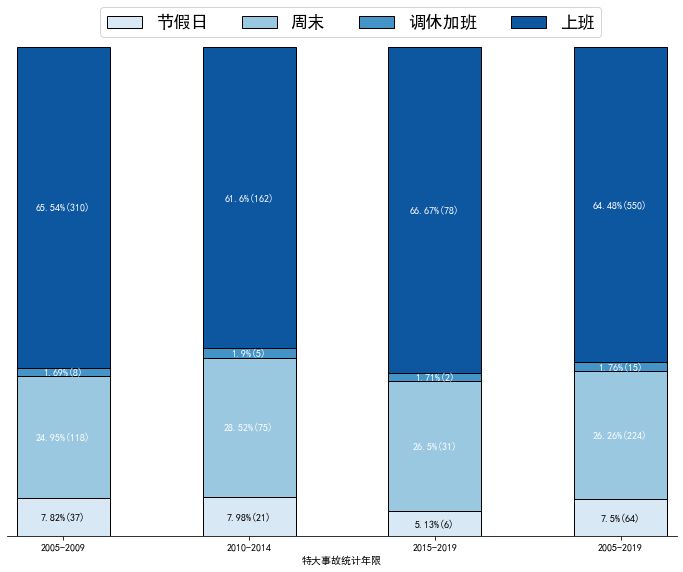

In [60]:
percentage_bar(data_finnal[data_finnal.columns[::-1]].T)
plt.xticks(rotation = 0)
ax = plt.gca()
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(False)
plt.xlabel('特大事故统计年限')
plt.savefig(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\9.png',dpi =200)

In [61]:
#再看相对指标
data_1 = pd.DataFrame({"2005-2009":[25.92,25.44,26.96],
                       "2010-2014":[14.41,13.36,16.70],
                       "2015-2019":[6.41,6.40,6.43],
                      "2005-2019":[15.56,15.07,16.70]},
                      index = ["平均事故率/%","工作日平均事故率/%","非工作日平均事故率/%"])
data_1

,2005-2009,2010-2014,2015-2019,2005-2019
平均事故率/%,25.92,14.41,6.41,15.56
工作日平均事故率/%,25.44,13.36,6.40,15.07
非工作日平均事故率/%,26.96,16.70,6.43,16.70


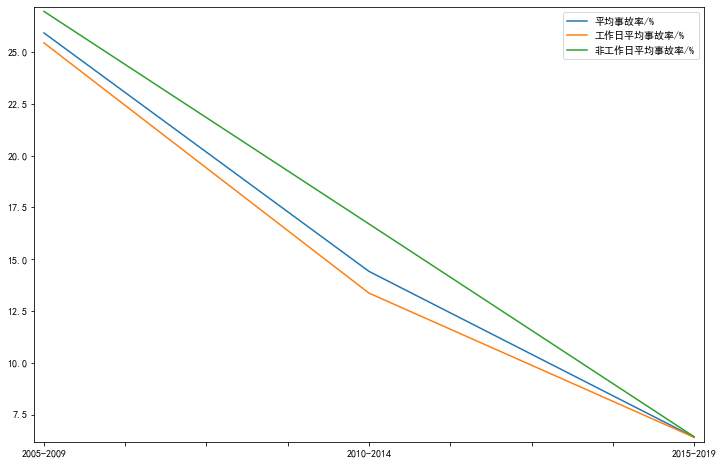

In [64]:
data_1[data_1.columns[:-1]].T.plot(figsize = (12,8))

### 具体的是有哪些节假日容易发生事故呢？

In [65]:
data['节假日'].value_counts()

国庆节    23
劳动节    14
春节     13
清明节     5
端午节     5
元旦      2
中秋节     2
Name: 节假日, dtype: int64

In [66]:
#查看某一节假日的事故，比如国庆节
data[data['节假日'].isin(['国庆节'])]

,time,province,city,accident,death,injury,year,month,day,holiday,weekend,节假日,weekend_work
85,2005-10-03,河南,鹤壁市煤业集团二矿 38 煤柱工作面采空区,瓦斯爆炸,34.0,19.0,2005,10,3,True,False,国庆节,False
86,2005-10-04,四川,广安市广安区境内四川煤炭产业集团公司所属广能集团龙滩煤矿,透水,28.0,NaN,2005,10,4,True,False,国庆节,False
87,2005-10-04,新疆,拜城县亚吐尔乡煤矿 1 号井,瓦斯爆炸,14.0,NaN,2005,10,4,True,False,国庆节,False
88,2005-10-04,广西,田林县境内田林县利周乡,坠沟,11.0,29.0,2005,10,4,True,False,国庆节,False
89,2005-10-04,甘肃,陇南市成县化垭乡开往县城成康路,坠崖,15.0,27.0,2005,10,4,True,False,国庆节,False
200,2006-10-01,重庆,沙坪坝区嘉陵江石门大桥引桥,坠桥,30.0,20.0,2006,10,1,True,False,国庆节,False
201,2006-10-05,新疆,库车县314 国道,追尾,10.0,3.0,2006,10,5,True,False,国庆节,False
202,2006-10-06,四川,宜宾市芙蓉煤矿,瓦斯爆炸,13.0,7.0,2006,10,6,True,False,国庆节,False
280,2007-10-01,湖南,常德市桃源县,翻车,11.0,NaN,2007,10,1,True,False,国庆节,False
281,2007-10-03,辽宁,丹东市大东港以南45海里处,撞沉,1.0,10.0,2007,10,3,True,False,国庆节,False


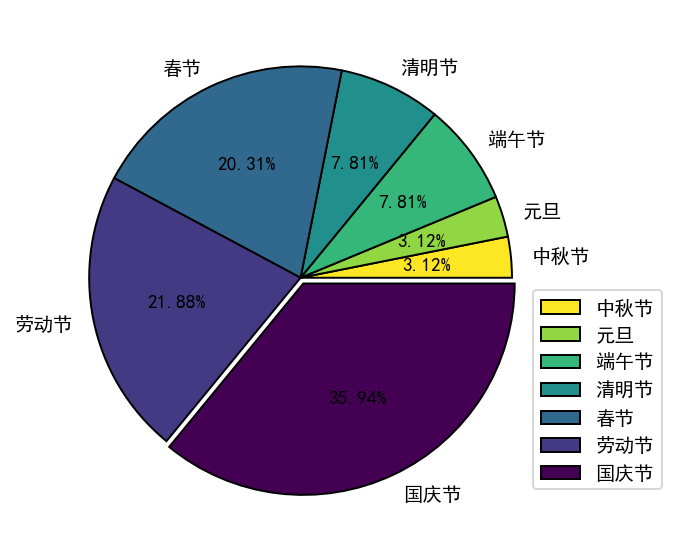

In [67]:
#绘制节假日事故饼图
plt.rcParams['figure.dpi'] = 140
data['节假日'].value_counts()[::-1].plot(kind='pie',autopct='%.2f%%',cmap='viridis_r',label = True,
                                wedgeprops={'linewidth': 1, 'edgecolor': "black"},
                                figsize=(10,5),
                               explode = [0,0,0,0,0,0,0.03])
plt.axis('off')
plt.legend(loc = (0.94,0.1))
plt.savefig(r'C:\Users\86177\Desktop\2005-2019年安全事故统计论文\img\10.png',dpi =200)